In [0]:
!gdown https://drive.google.com/uc?id=1nlyTRO9s7ldMavCtH8lhtiqbDpU_pVZf
import zipfile
with zipfile.ZipFile("store-sales.zip","r") as zip_ref:
    zip_ref.extractall("")
    

Downloading...
From: https://drive.google.com/uc?id=1nlyTRO9s7ldMavCtH8lhtiqbDpU_pVZf
To: /content/store-sales.zip
7.24MB [00:00, 33.7MB/s]


<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;"><a href="http://www.datascience-paris-saclay.fr">
<img border="0" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/06/%C3%89cole_polytechnique_signature.svg/1200px-%C3%89cole_polytechnique_signature.svg.png" width="70%"> </td>
     <td style="background-color:transparent;">
<img border="0" src="https://lareclame-scanbook.s3.amazonaws.com/w-wavestone15026550241528205279-realisation-fancybox.png?width=auto" width="40%"> </td>
  </tr>
</table> 
</div>

<center><h1>Projet Data Science </h1></center>
<center><h1>Cours Machine Learning –Business Case</h1></center>
<br/>
<center><h4>Virgile Rennard,Nabil Madali , Mélanie Karlsen </h4></center>

#Réalisation d’un Projet Data Science

##4.1 Context
You are Data Scientist in the IT department in a large French company. The company generates a lot of data but for the moment no machine learning model has been set up to use it.

## 4.3 Statistical Data Analysis & Data Validation



From this step, you will focus on the dataset available from the following link: https://drive.google.com/open?id=1nlyTRO9s7ldMavCtH8lhtiqbDpU_pVZf

The company that employs you operates more than 3,000 stores in 7 European countries. Currently, store managers are responsible for estimating their daily sales up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school holidays, seasonality and location. With thousands of individual managers predicting sales based on their particular situation, the accuracy of the results can be very variable.


## Exploratory Data Analysis 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12.0, 10.0)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



## Loading the data

We load purely the training set data here.


In [0]:
train = pd.read_csv("store-sales/train.csv")
store = pd.read_csv("store-sales/store.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
train['Date'] = pd.to_datetime(train['Date'], infer_datetime_format=True)

# data extraction
train['Year'] = train.Date.dt.year
train['Month'] = train.Date.dt.month
train['Day'] = train.Date.dt.day
train['WeekOfYear'] = train.Date.dt.weekofyear

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

- Id - an Id that represents a (Store, Date) duple within the test set

- Store - a unique Id for each store

- Sales - the turnover for any given day
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends.
 a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
- StoreType - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance - distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store



## Data Exploration



### Handling Missing Values

Data in real world are rarely clean and homogeneous. Typically, they tend to be incomplete, noisy, and inconsistent and it is an important task of a Data scientist to prepossess the data by filling missing values. It is important to be handled as they could lead to wrong prediction or classification for any given model being used.How many missing fields each variable has:

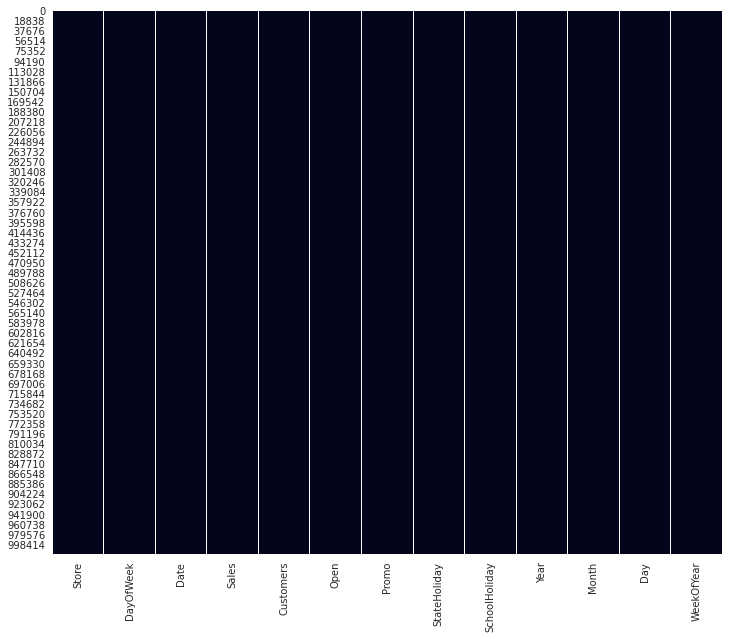

In [0]:
sns.heatmap(train.isnull(), cbar=False)
plt.savefig("plot1.png")

In [0]:
train.isna().sum()/train.shape[0] 

Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
Year             0.0
Month            0.0
Day              0.0
WeekOfYear       0.0
dtype: float64

We can see that the the columns have got a good fill rate. We don't need to do any change for the train set for now at least.

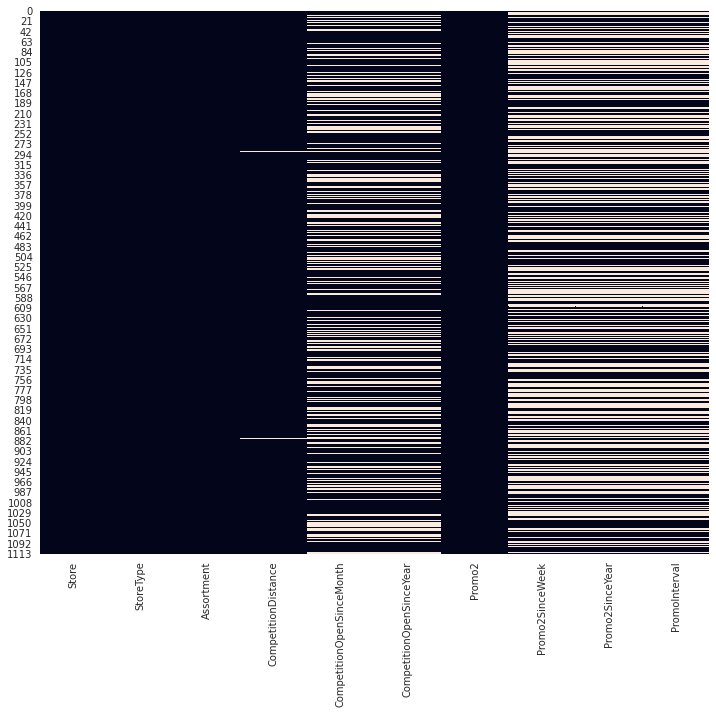

In [0]:
sns.heatmap(store.isnull(), cbar=False)
plt.savefig("plot2.png")

In [0]:
store.isna().sum()/store.shape[0] 

Store                        0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.002691
CompetitionOpenSinceMonth    0.317489
CompetitionOpenSinceYear     0.317489
Promo2                       0.000000
Promo2SinceWeek              0.487892
Promo2SinceYear              0.487892
PromoInterval                0.487892
dtype: float64



The Promo2SinceWeek,Promo2SinceYear and PromoInterval variables has 48% fill rate since they are actually NULL values because there are no continuous promotion for those stores.

Instead for CompetitionOpenSinceMonth and CompetitionOpenSinceYear, it's basically missing data that we're dealing with here ,we have the nearest distance of the competitor but miss the date information on when did he actually opened next to the Rossman store.


There might be two better options than replacing NaN  - at least in the context of a data science challenge :

* replace this with the most common value (mode).
* predict the missing value using the data you have

For the sake of simplicity, we have chosen to replace the entire nan value with 0


In [0]:
store.fillna(0, inplace = True)

### What's closed (and what's open) 

We first explore the data to see if we can find any things that can be manually separated. From scrolling through the columns, we see that there are certain periods where sales are 0 because the stores are closed. Let's see if this is true.


In [0]:
not_open = train[(train['Open'] == 0) & (train['Sales'] != 0)]
print("No closed store with sales: " + str(not_open.size == 0))

No closed store with sales: True


What about open store but no sales? Are there any?

In [0]:
no_sales = train[(train['Open'] == 1) & (train['Sales'] <= 0)]
print("No open store with no sales: " + str(no_sales.size == 0))

No open store with no sales: False


In [0]:
train[(train.Open == 0)].count()[0]

172817

In [0]:
train[(train.Open == 0) &(train.StateHoliday == "0")& ( train.SchoolHoliday == 0)].count()[0]

121482

There're 172817 closed stores in the data. It is about 10% of the total amount of observations.

From those closed events, 3067 times occured because there was a school holiday. 

And 30140 times it occured because of either a bank holiday or easter or christmas.

But interestingly enough, 121482 times those shops closed on days for no apparent reason when no holiday was announced. 


 To avoid any biased forecasts we will drop these values.

In [0]:
train = train.loc[train['Sales'] > 0]
assert(train[train['Sales'] == 0].size == 0)

### Sales and the Customer Experience

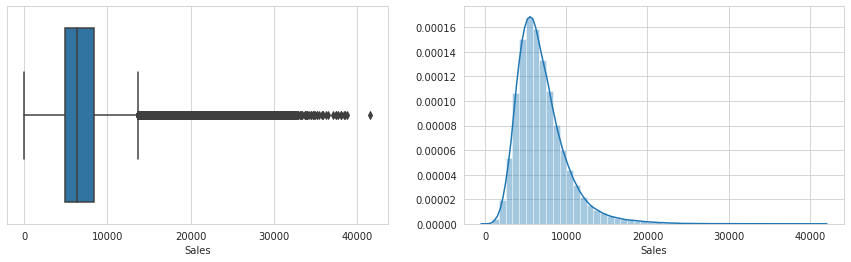

In [0]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.boxplot(x=train["Sales"],ax=axis1)
sns.distplot(train["Sales"],ax=axis2)
plt.savefig("plot3.png")

Some exceptions (the outliers) in the boxplot had to be checked to see if it's wrong inputted data but it turns out this big amount of sales on certain days is explained by either promotional purposes,the type of the store being big and popular or just not having near enough competition and being the monopoly in its region. (Charts will come in the analysis section of the train and store dataset when merged).

An important metric to always check when looking at a distribution is how the mean compares to the median and how close are they from each other. As we see here a mean of 6955 versus 6369 in median is a very good sign that there are no extravagant values affecting the general distribution of Sales.

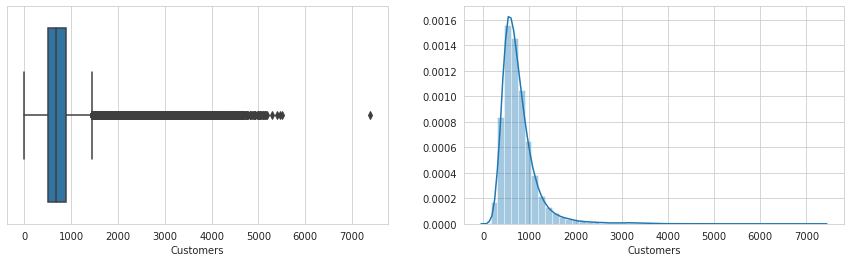

In [0]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.boxplot(x=train["Customers"],ax=axis1)
sns.distplot(train["Customers"],ax=axis2)
plt.savefig("plot4.png")

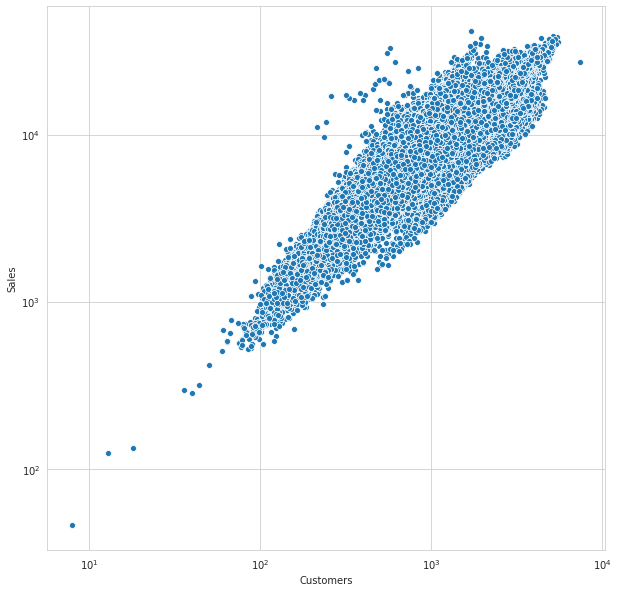

In [0]:


f, ax = plt.subplots(figsize=(10, 10))
ax.set(xscale="log", yscale="log")

sns.scatterplot(x="Customers", y="Sales",ax=ax, data=train[train.Sales != 0 & train.Customers])
plt.savefig("plot5.png")



There is a strong positive correlation between Sales and Customers. In general, the more customers you have in a store, the higher your sales for the day.


We observe a right skewness in both distributions because of the low number of outliers but the high representation of each outlier alone which pushes the distribution to the left  as seen in both histograms.This typically occurs when the mean is higher than the median.



We are dealing with time series data so it will probably serve us to extract dates for further analysis. We also have two likely correlated vaiables in the dataset, which can be combined into a new feature.



In [0]:
train['SalesPerCustomer'] = train['Sales'] / train['Customers']
train['SalesPerCustomer'].describe()

count    844338.000000
mean          9.493641
std           2.197448
min           2.749075
25%           7.895571
50%           9.250000
75%          10.899729
max          64.957854
Name: SalesPerCustomer, dtype: float64

On average customers spend about 9.50$ per day. 

### Merge, join, and concatenate

Merge DataFrame or named Series objects with a database-style join.The join is done on columns or indexes. If joining columns on columns, the DataFrame indexes will be ignored. Otherwise if joining indexes on indexes or indexes on a column or columns, the index will be passed on.

In [0]:
df = pd.merge(train, store, how = 'inner', on = 'Store')

In [0]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,7,30,31,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,7,29,31,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,7,28,31,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,7,27,31,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


###  Sunday Funday!

 It can be observed that at the beginning of each week, the store's passenger flow and sales are declining, and there will be a surge in the weekend, but an interesting The phenomenon is that there is more traffic on weekends, but its per capita sales have dropped.

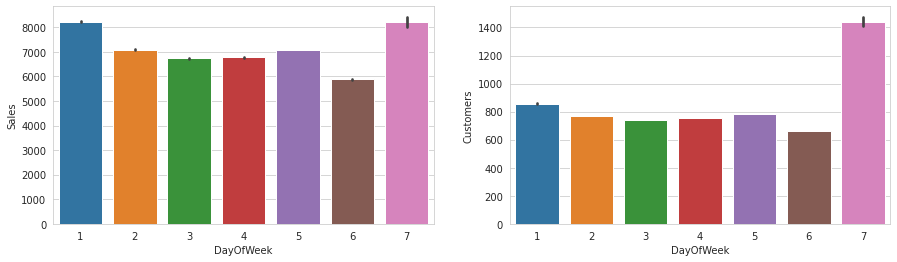

In [0]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=df, ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=df, ax=axis2)
plt.savefig("plot6.png")

### Store Type

In this section we will closely look at different levels of StoreType and how the main metric Sales is distributed among them.

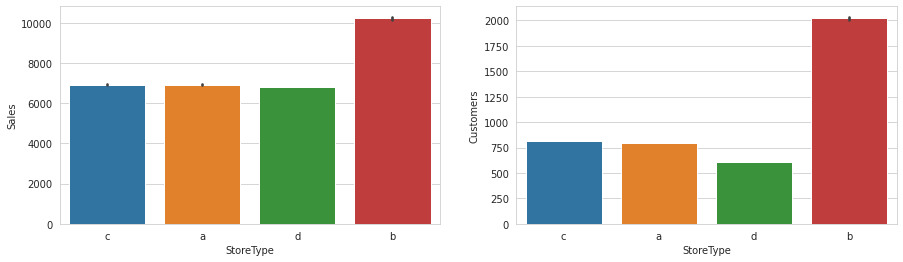

In [0]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StoreType', y='Sales', data=df,ax=axis1)
sns.barplot(x='StoreType', y='Customers', data=df, ax=axis2)
plt.savefig("plot7.png")



The Storetype A has the highest number of branches,sales and customers from the 4 different storetypes however we have much less data for it. 

When looking at the average sales and number of customers, we see that actually it is Storetype B who was the highest average Sales and highest average Number of Customers. 

StoreType D who has the highest average spending per Customer, this is probably explained by an average competition distance higher than ther rest .




### Sales Deal and Promotions

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


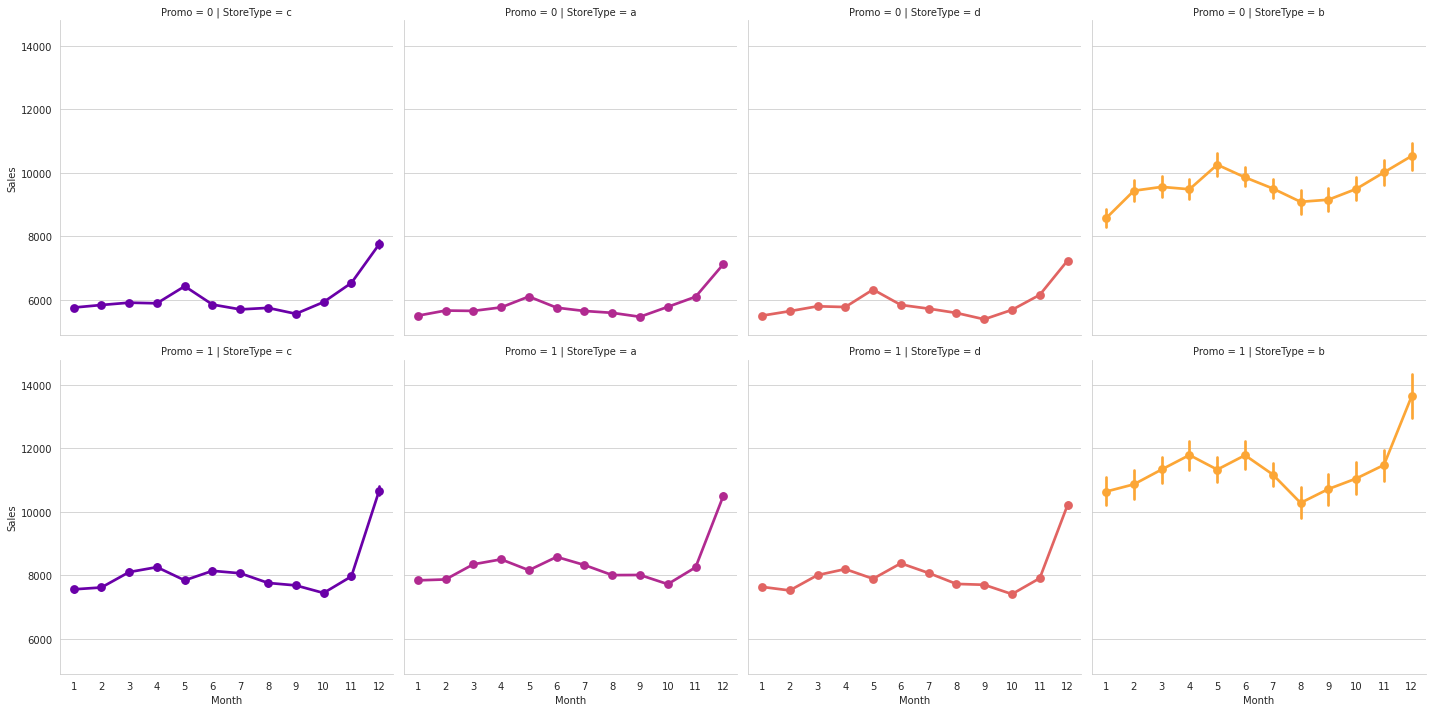

In [0]:
sns.factorplot(data = df, x = 'Month', y = "Sales", 
               col = 'StoreType', 
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo' 
               ) 
plt.savefig("plot8.png")


Store that have promotion on a given day changes its amount of sales considerably.


A slight increase Year over Year but we don't see any major change from 2013 to 2015 ,similair pattern in the months over the years with major spikes first around Easter period in March and April then in Summer in May,June and July and then finally around the Christmas period in November and December.Sales escalate towards Christmas holidays.


All store types follow the same trend but at different scales depending on the presence of the promotion Promo and StoreType .


StoreType C are all closed on Sundays, whereas others are most of the time opened. 

StoreType D are closed on Sundays only from October to December.


### Competition Distance

In [0]:

df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    

df['PromoOpen'] = 12 * (df.Year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek) / 4.0


df.fillna(0, inplace = True)


df.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

,Sales,Customers,PromoOpen,CompetitionOpen
StoreType,,,,
a,6925.697986,795.422370,12918.492198,7115.514452
b,10233.380141,2022.211825,17199.328069,11364.495244
c,6933.126425,815.538073,12158.636107,6745.418694
d,6822.300064,606.353935,10421.916846,9028.526526


## Correlational Analysis


A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses

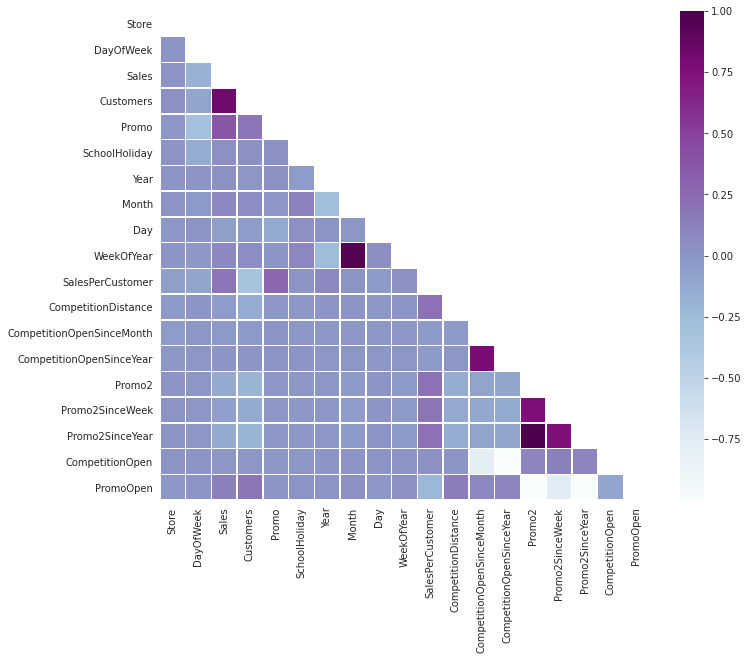

In [0]:
# Compute the correlation matrix 
corr_all = df.drop('Open', axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")     
plt.savefig("plot9.png") 
plt.show()



Strong positive correlation between the amount of Sales and Customers of a store. 

Positive correlation between the fact that the store had a running promotion and amount of Customers.

When the store continues a consecutive promotion  the number of Customers and Sales seems to stay the same or even decrease .


StoreType does play a role with Sales per Customer .


## Building the model


From the visualization above, you can see that sales are closely related to time, but there are many other characteristics that affect it, such as distance from competitors, whether it is during school holidays and whether there  Advertisement promotion and so on. Also, the missing values ​​and outliers in the data will affect the sales forecast. 

**XGBoost:** The excellent performance of Gradient Boosting itself plus XGBoost's highly efficient implementation can make it perform well in this project, and the first place in Kaggle competition is mainly the use of  this algorithm for the results Make  forecast. XGBoost has customized  a data matrix class DMatrix, which will be pre-processed at the beginning of training  a pre-processing  to improve the efficiency of each iteration afterwards. The main parameters that need to be debugged are as follows:

 * **eta:** Shtinkage parameter, used to change the weight of new subnodes, multiplied by this coefficient, which is equivalent to the learning rate
 * **nthread:** the number of threads 
 
 
 * **subsample:**  The samples are randomly sampled. The lower value makes the algorithm more conservative and prevents overfitting, but too small a value can also cause underfitting

 * **colsample_bytree:** This is a family of parameters for subsampling of columns.The general setting is: 0.5-1





In [0]:
avg_store = train.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].mean()
avg_store.rename(columns=lambda x: 'Avg' + x, inplace=True)
df = pd.merge(avg_store.reset_index(), df, on='Store')

In [0]:
med_store = train.groupby('Store')[['Sales', 'Customers', 'SalesPerCustomer']].median()
med_store.rename(columns=lambda x: 'Med' + x, inplace=True)

df = pd.merge(med_store.reset_index(), df, on='Store')

In [0]:
df.head()

,Store,MedSales,MedCustomers,MedSalesPerCustomer,AvgSales,AvgCustomers,AvgSalesPerCustomer,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
0,1,4647.0,550.0,8.362376,4759.096031,564.049936,8.393038,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.75
1,1,4647.0,550.0,8.362376,4759.096031,564.049936,8.393038,4,2015-07-30,5020,546,1,1,0,1,2015,7,30,31,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.75
2,1,4647.0,550.0,8.362376,4759.096031,564.049936,8.393038,3,2015-07-29,4782,523,1,1,0,1,2015,7,29,31,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.75
3,1,4647.0,550.0,8.362376,4759.096031,564.049936,8.393038,2,2015-07-28,5011,560,1,1,0,1,2015,7,28,31,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.75
4,1,4647.0,550.0,8.362376,4759.096031,564.049936,8.393038,1,2015-07-27,6102,612,1,1,0,1,2015,7,27,31,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.75


In [0]:


df['StoreType'] = df['StoreType'].astype('category').cat.codes
df['Assortment'] = df['Assortment'].astype('category').cat.codes
df["StateHoliday"] = df["StateHoliday"].astype('category').cat.codes



columns = [
        'CompetitionOpenSinceMonth',
        'CompetitionOpenSinceYear',
        'Promo2SinceWeek', 
        'Promo2SinceYear', 
    ]
df[columns] = df[columns].astype(int)
    

In [0]:

features = df.copy()
features.head()

,Store,MedSales,MedCustomers,MedSalesPerCustomer,AvgSales,AvgCustomers,AvgSalesPerCustomer,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
0,1,4647.0,550.0,8.362376,4759.096031,564.049936,8.393038,5,2015-07-31,5263,555,1,1,1,1,2015,7,31,31,9.482883,2,0,1270.0,9,2008,0,0,0,0,82.0,24187.75
1,1,4647.0,550.0,8.362376,4759.096031,564.049936,8.393038,4,2015-07-30,5020,546,1,1,1,1,2015,7,30,31,9.194139,2,0,1270.0,9,2008,0,0,0,0,82.0,24187.75
2,1,4647.0,550.0,8.362376,4759.096031,564.049936,8.393038,3,2015-07-29,4782,523,1,1,1,1,2015,7,29,31,9.143403,2,0,1270.0,9,2008,0,0,0,0,82.0,24187.75
3,1,4647.0,550.0,8.362376,4759.096031,564.049936,8.393038,2,2015-07-28,5011,560,1,1,1,1,2015,7,28,31,8.948214,2,0,1270.0,9,2008,0,0,0,0,82.0,24187.75
4,1,4647.0,550.0,8.362376,4759.096031,564.049936,8.393038,1,2015-07-27,6102,612,1,1,1,1,2015,7,27,31,9.970588,2,0,1270.0,9,2008,0,0,0,0,82.0,24187.75


## Training Loss

We choose  RMSE (root mean square error) as training loss, which is the square root of the number of predictions N on the square ratio of the deviation of the predicted value and the actual value. The formula is as follows. $$ \frac{1}{n}\sum_{i=1}^{n}(y_i -\hat{y}_i)^2 $$ 
$ y_i $ represents sales at a specified date and time The amount, $ \hat {y_i} $ represents the predicted value, and the store with 0 sales on that day will be ignored) Because the Sales skew is large.

RMSPE is very sensitive to the large or small errors in a set of predictions, so it can well reflect the precision of model predictions. For the sales volume that needs to be predicted in the project, the use of RMSPE can well represent the effect of the model.

In [0]:
from sklearn.model_selection import train_test_split
X = [
    'Store', 
    'Customers',
    'CompetitionDistance', 

    'Promo', 
    'Promo2', 
    'StateHoliday',
    'StoreType',
    'Assortment',

    'AvgSales',
    'AvgCustomers',
    'AvgSalesPerCustomer',
    
    'MedSales',
    'MedCustomers',
    'MedSalesPerCustomer',

    'DayOfWeek',
    'Day',
    'Month',
    'Year',

    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'Promo2SinceWeek',
    'Promo2SinceYear',
]
X_train, X_test, y_train, y_test = train_test_split(features[X], features['Sales'], test_size=0.15, random_state=10)

In [0]:
import xgboost as xgb


def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", np.sqrt(np.mean((yhat/y-1) ** 2))

xgboost_tree = xgb.XGBRegressor(
    n_jobs = -1,
    n_estimators = 1000,
    eta = 0.1,
    max_depth = 2,
    min_child_weight = 2,
    subsample = 0.8,
    colsample_bytree = 0.8,
    tree_method = 'exact',
    reg_alpha = 0.05,
    silent = 0,
    random_state = 1023
)
xgboost_tree.fit(X_train[X], np.log1p(y_train), 
                 eval_set = [(X_train[X], np.log1p(y_train)), (X_test[X], np.log1p(y_test))],
                 eval_metric = rmspe_xg,
                 early_stopping_rounds = 300
                )

[11:26:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:7.44248	validation_1-rmse:7.4439	validation_0-rmspe:0.99953	validation_1-rmspe:0.99953
Multiple eval metrics have been passed: 'validation_1-rmspe' will be used for early stopping.

Will train until validation_1-rmspe hasn't improved in 300 rounds.
[1]	validation_0-rmse:6.69916	validation_1-rmse:6.70046	validation_0-rmspe:0.998834	validation_1-rmspe:0.998834
[2]	validation_0-rmse:6.03026	validation_1-rmse:6.03143	validation_0-rmspe:0.99758	validation_1-rmspe:0.997581
[3]	validation_0-rmse:5.42833	validation_1-rmse:5.42936	validation_0-rmspe:0.995469	validation_1-rmspe:0.995471
[4]	validation_0-rmse:4.88664	validation_1-rmse:4.88762	validation_0-rmspe:0.992133	validation_1-rmspe:0.992135
[5]	validation_0-rmse:4.39914	validation_1-rmse:4.4001	validation_0-rmspe:0.987149	validation_1-rmspe:0.987153
[6]	validation_0-rmse:3.96045	validation_1-r

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=2, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=1023,
             reg_alpha=0.05, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=0, subsample=0.8, tree_method='exact', verbosity=1)

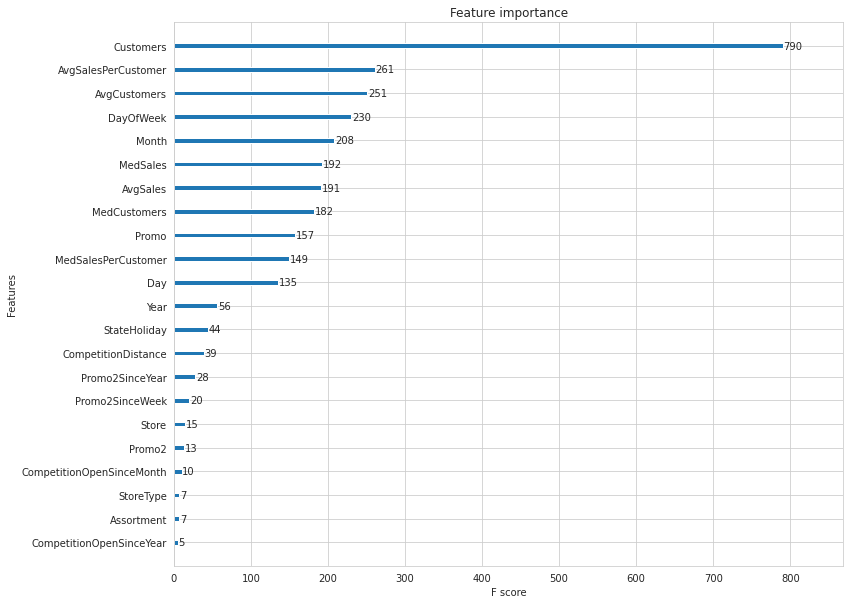

In [0]:
xgb.plot_importance(xgboost_tree)
plt.savefig("plot10.png")


Promotion is primordial for a store to increase its sales, it allows price breaking and thus more customers intersted in buying.



During a week , the pattern varies a lot if it's a sunday or a monday for instance and each day in the week has his own attributes and properties that allow to know how much are we going to sell.

XGBoost is more sensitive to time,  The important characteristics are SalesPerDay and Promo, that is, the average daily sales of a certain store and whether it is going to be carried out promotion is the most important impact characteristic
